In [30]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


In [31]:
data_train = pd.read_csv(rf'C:\Users\wipip\OneDrive\Documentos\GitHub\Boosting_Algorithms-main\data\processed\data_train.csv')
data_test = pd.read_csv(rf'C:\Users\wipip\OneDrive\Documentos\GitHub\Boosting_Algorithms-main\data\processed\data_test.csv')

In [32]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   embarazos       568 non-null    float64
 1   glucosa         568 non-null    float64
 2   presion_sangre  568 non-null    float64
 3   grosor_piel     568 non-null    float64
 4   insulina_nivel  568 non-null    float64
 5   BMI             568 non-null    float64
 6   DPF             568 non-null    float64
 7   edad            568 non-null    float64
 8   diagnositco     568 non-null    float64
dtypes: float64(9)
memory usage: 40.1 KB


In [33]:
data_train.head()

,embarazos,glucosa,presion_sangre,grosor_piel,insulina_nivel,BMI,DPF,edad,diagnositco
0,1.0,112.0,72.0,30.0,176.0,34.4,0.528,25.0,0.0
1,0.0,98.0,82.0,15.0,84.0,25.2,0.299,22.0,0.0
2,1.0,99.0,72.0,30.0,18.0,38.6,0.412,21.0,0.0
3,1.0,97.0,66.0,15.0,140.0,23.2,0.487,22.0,0.0
4,3.0,191.0,68.0,15.0,130.0,30.9,0.299,34.0,0.0


In [34]:
X_train = data_train.drop('diagnositco', axis=1)
y_train = data_train['diagnositco']
X_test = data_test.drop('diagnositco', axis=1)
y_test = data_test['diagnositco']


Primero utilizaremos el modelo de decision tree para comparar nuestros resultados

In [35]:
from sklearn.tree import DecisionTreeClassifier

mod_tree = DecisionTreeClassifier(random_state=42)
mod_tree.fit(X_train, y_train)
y_pred_tree = mod_tree.predict(X_test)

presicion_tree = accuracy_score(y_test, y_pred_tree)
print(f'La precision del modelo de clasificacion de arbol de decision sera igual a {presicion_tree}')

La precision del modelo de clasificacion de arbol de decision sera igual a 0.7832167832167832


En este paso uno utilizamos el train test, debido a que ya tenemos dividido nuestro data set procesado. 

In [36]:
from xgboost import XGBClassifier
mod = XGBClassifier(random_state = 42)

In [37]:
mod.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [38]:
y_pred = mod.predict(X_test)

In [39]:
presicion = accuracy_score(y_test, y_pred)

print(f'La precision del modelo XG boost sera de {presicion}')

La precision del modelo XG boost sera de 0.7412587412587412


Esta es una precision que puede darse como aceptable pero utilizaremos los hiperparametros para mejorarla, la intencion de este paso sera la de superar el modelo de arbol de decision que inicialmente nos dio una mejor prediccion con los valores de default de sus hiperparametros. 

Los hiper parametros de XG boost son los siguientes: 
- **n_estimators**: Número de árboles de decisión. Más árboles pueden aumentar la precisión, pero también el tiempo de cómputo.

- **learning_rate**: La tasa de aprendizaje en cada iteración. Una tasa más baja requiere más árboles para lograr la misma complejidad.

- **max_depth**: Profundidad máxima de cada árbol. Controla cuán complejos pueden ser los árboles.

- **subsample**: Fracción de muestras para entrenar cada árbol. Ayuda a prevenir el sobreajuste.

- **min_child_weight**: Suma mínima de pesos de instancias en un nodo hijo. Evita que el modelo aprenda patrones demasiado específicos.

- **colsample_bytree**: Fracción de características a considerar al construir cada árbol. Ayuda a manejar datos de alta dimensión.



Crearemos un random search para la busqueda de los mejores parametros.

In [43]:
parametros= {
    'n_estimators': [100, 200, 300, 500, 1000],
    'learning_rate': [0.001,0.01, 0.1],
    'max_depth': [5, 6,10,15],
    'subsample': [0.6, 0.7, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2, 0.3],
    'min_child_weight': [5, 7, 10, 12]
}

random_grid = RandomizedSearchCV(
    estimator= mod,
    param_distributions=parametros,
    n_iter=3000,
    scoring= 'accuracy',
    cv= 5,
    verbose=1,
    random_state=42,
    n_jobs=1
    
)

In [44]:
random_grid.fit(X_train, y_train)

Fitting 5 folds for each of 3000 candidates, totalling 15000 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=3000, n_jobs=1,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8,
                                                             0.9],
                                        'gamma': [0, 0.1, 0.2, 0.3],
                                        'learning_rate': [0.001, 0.01, 0.1],
                                        'max_depth': [5, 6, 10, 15],
                                        'min_child_weight': [5, 7, 10, 12],
                                        'n_estimators': [100, 200, 300, 500,
                                                         1000],
                                        'subsample': [0.6, 0.7, 0.8, 0.9]},
                   random_state=42, scoring='accuracy', verbose=1)

In [45]:

best_model = random_grid.best_estimator_
print("Mejores hiperparámetros encontrados:")
print(random_grid.best_params_)

y_pred_best = best_model.predict(X_test)
precision_best_random = accuracy_score(y_test, y_pred_best)
print(f"Precisión en el conjunto de prueba: {precision_best_random}")

Mejores hiperparámetros encontrados:
{'subsample': 0.7, 'n_estimators': 500, 'min_child_weight': 12, 'max_depth': 10, 'learning_rate': 0.01, 'gamma': 0.3, 'colsample_bytree': 0.9}
Precisión en el conjunto de prueba: 0.7832167832167832


Haremos una funcion para ver las curvas de aprendizaje y comparar com actua el modelo con los datos de entrenamiento y los datos de testeo de forma grafica y con ello identificar si tenemos un nivel de sobreajuste. 

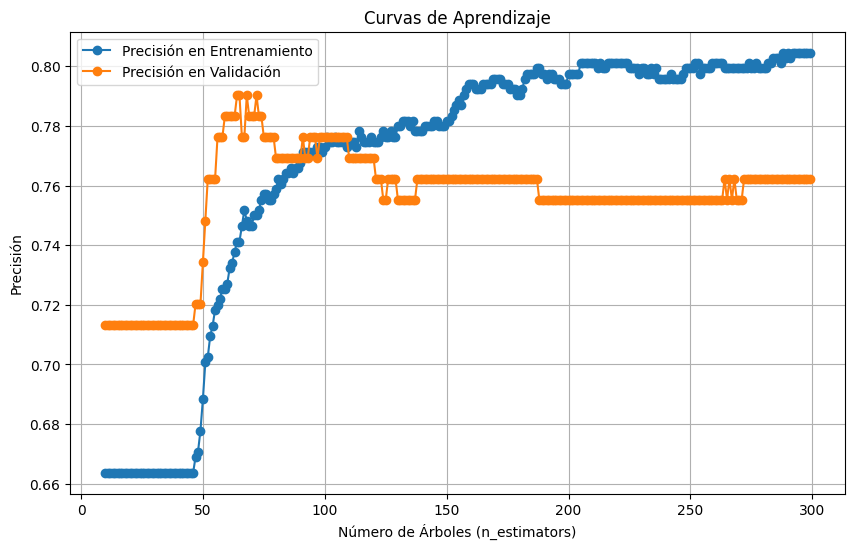

In [68]:
import numpy as np
import matplotlib.pyplot as plt
def plot_learning_curves_with_best_params(X_train, y_train, X_val, y_val, best_params, n_estimators_range):

    train_accuracies = []
    val_accuracies = []

    for n_estimators in n_estimators_range:
        best_params['n_estimators'] = n_estimators
        model = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='mlogloss')
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        train_accuracy = accuracy_score(y_train, y_train_pred)
        train_accuracies.append(train_accuracy)
        y_val_pred = model.predict(X_val)
        val_accuracy = accuracy_score(y_val, y_val_pred)
        val_accuracies.append(val_accuracy)
    plt.figure(figsize=(10, 6))
    plt.plot(n_estimators_range, train_accuracies, label='Precisión en Entrenamiento', marker='o')
    plt.plot(n_estimators_range, val_accuracies, label='Precisión en Validación', marker='o')
    plt.xlabel('Número de Árboles (n_estimators)')
    plt.ylabel('Precisión')
    plt.title('Curvas de Aprendizaje')
    plt.legend()
    plt.grid(True)
    plt.show()
y_val = y_test
best_params = {
    'subsample': 0.7,
    'n_estimators': 500,
    'min_child_weight': 12,
    'max_depth': 10,
    'learning_rate': 0.01,
    'gamma': 0.3,
    'colsample_bytree': 0.9
}
n_estimators_range = np.arange(10, 300, 1)
plot_learning_curves_with_best_params(X_train, y_train, X_test, y_val, best_params, n_estimators_range)


In [69]:

mod_2 = XGBClassifier(subsample= 0.7,
    n_estimators=65,
    min_child_weight=12,
    max_depth=10,
    learning_rate=0.01,
    gamma=0.3,
    colsample_bytree=0.9)

In [70]:
mod_2.fit(X_train, y_train)
y_pred_2 = mod_2.predict(X_test)

accuracy_score(y_test, y_pred_2)

0.7902097902097902

Utilizado las curvas de aprendizaje para determinar si nuestro modelo estaba cometiendo o no overfitting logramos descubrir el punto correcto de estimadores, que inicialmente, utiilizando el random search se habia determinado como 500, esto nos permite ver como el tuning de hiperparametros es un proceso de atencion al detalle. 

Tomamos como exitoso el proyecto, debido a que lo que buscabamos era obtener una mejor precision en el modelo XGB comparandolo con el modelo de decision tree.

Ahora buscaremos explicar la seleccion de hiperparametros y porque estos han sido los mas adecuados.

El subsample de 0.7 es un hiperparametro de control de variabilidad, lo que significa que cada arbol generado va a ser entrenado con el 70% de las muestras seleccionadas aleatoriamente del conjunto de entrenamiento. Se sabe que el rango tipico de este hiperparametro esta en 0.5-1.0, el hecho de utilizar este valor nos ayuda a introducur variabilidad al entrenamiento de los arboles y prevenir el sobreajuste ya que evitamos que el modelo memorice el ruido de los datos conservando la diversidad para predicciones mas generalizadas. 

El numero de estimadores (n_estimators): es de 65 lo cual es un valor bajo en terminos generales, sin embargo para este data set en especifico no es tan bajo, debido a que solo tenemos menos del millar de filas, se sabe que esta en los limites de ser minimo, pero tomando en cuenta el tamanio del data set podemos tomarlo como un valor valido para evitar crear un modelo demasiado complejo o incluso un modelo que este sobreajustado. 

El numero de muestras minimas requeridas en cada hoja del arbol es igual a 12, lo que es un valor alto pero en este caso adecuado ya que aumentar el valor de min_child_weight nos ayuda a generalizar en el modelo y evitar tanto sobre ajuste como tener particiones demasiado especificas que hagan que el modelo se ajuste al ruido o datos no relevantes. Este valor nos ayuda a tener un modelo mas robusto. 

La profundidad maxima de 10 (max_depth) es relativamente alta para el tamanio del data set, sin embargo nos permite capturar una mayor complejidad sin caer en el sobreajuste y manteniendo la capacidad de generalizacion del modelo.  

El learning rate es de 0.01 lo cual es un valor que nos dice que cada arbol contrubuira de forma lenta a la prediccion final, es un valor bajo. Esto es algo curioso ya que se sabe que una tasa de aprendizaje lenta se debe combinar con una mayor cantidad de estimadores para obtener un rendimiento optimo. El tener una tasa de aprendizaje lenta junto con un numero de estimadores bajo se atribuye a el tamanio reducido del dataset, ya que al ser pequenio los ajustes tan reservados si nos dan una respuesta positiva en el modelo en un numero de iteraciones bajo, al combinarlos tendremos una gran precision y tambien eficiencia en el modelo.

El valor seleccionado para el porcentaje de caracteristicas en cada arbol, en otras palabras la fraccion de columnas que va a utilizar el modelo para crear cada arbol, este hiperparametro siempres tendra sus valores entres cero y uno. Nosotros tenemos un valor de 0.9 el cual es bastante alto e indica que estamos buscando darle mas informacion del modelo a cada arbol, esto es util para que el modelo aprenda patrones complejos, sin embargo reduce la variabilidad y puede resultar en un sobre ajuste. Se presume que un valor alto funciona en el modelo debido a que no tenemos una gran cantidad de caracteristicas irrelevantes ni altamente correlacionadas. 

finalmente tendremos el valor de gamma que en nuestro caso es de .3, este hiperparametro es de regularizacion y nos permite controlar cuanto es el minimo que nuestro modelo debe mejorar para poder realizar cada particion, se puede ver como una metrica parecida al error cuadratico medio, algo que nos permite determinar y evaluar cada particion. Cuando tenemos valores cercanos a cero significa que no es necesaria una gran mejora para cada particion y que se pueden hacer muchas divisiones en cada nodo, aunque estas presenten una mejora minima, lo que puede llevar a capturar ruido y con ello tambien el sobre ajuste, por otro lado cuando tenemos valores altos (cercanos a uno), estamos evitando que el modelo se divida en ramas por mejoras pequenias, lo que nos da un modelo mas simple, pero enfocado en patrones muy significativos para el resultado. Gama sera la regularizacion que controla las divisiones de cada arbol y la reduccion de la perdida sera la mejora que vendra con cada particion. 
Nuestro valor de 0.3 nos da un comportamiento en el modelo que ayuda a controlar que el modelo no se vuelva demasiado complejo, pero al ser moderada, taambien nos da un equilibrio entre la regularizacion y la capacidad predictiva. 




In [73]:
#Guardaremos el modelo utilizando jbolib
import joblib
modelo_final = mod_2

joblib.dump(modelo_final, rf'C:\Users\wipip\OneDrive\Documentos\GitHub\Boosting_Algorithms-main\models\modelo_XGBoost_prediccion_de_diabetes')

['C:\\Users\\wipip\\OneDrive\\Documentos\\GitHub\\Boosting_Algorithms-main\\models\\modelo_XGBoost_prediccion_de_diabetes']

Por otro lado no podemos ignorar la anomalia inicial, donde vimos que el modelo de decision tree tenia una mejor precision que el modelo de XGB ambos con valores de default para sus hiperparametros, 

Si bien, enocontrar una respuesta a esta pregunta puede ser un proceso muy largo, haremos una comparacion de los modelos con el data set antes de ser procesado, para determinar que el problema no esta en la forma en la que se hizo el EDA y la ingenieria de caracteristicas. De ser el caso puede ser debido a una gran cantidad de features, relaciones no lineales complejas o un ruido excesivo. 

In [60]:
data_raw = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [61]:
X = data_raw.drop('Outcome', axis=1)
y = data_raw['Outcome']

In [64]:
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X, y, test_size=.20, random_state=42)

In [66]:
#haremos los dos en una celda 

raw_tree = DecisionTreeClassifier(random_state=42)
raw_tree.fit(X_train_raw, y_train_raw)
y_p_traw = raw_tree.predict(X_test_raw)
p_r_t = accuracy_score(y_test_raw, y_p_traw)
print(f'Precision = {p_r_t}')

raw_XGB = XGBClassifier(random_state=42)
raw_XGB.fit(X_train_raw, y_train_raw)
y_p_XGBraw = raw_XGB.predict(X_test_raw)
p_r_XGB = accuracy_score(y_test_raw, y_p_XGBraw)
print(f'Precision = {p_r_XGB}')

Precision = 0.7467532467532467
Precision = 0.7077922077922078


Podemos observar el mismo comportamiento por lo que esta diferencia entre precisiones donde vemos una mayor precision en el decision tree classifier no se le adjudicara al procesamiento de datos, en futuras iteraciones profundizaremos mas en ello. :)